# Regularization, Shrinkage and Non-Full Model to Avoid Overfitting


## Subset Selection

+ Multiple explanatory variables.
+ A learning method is one that maximizes the fitting.
+ If using all variables and maximizing the fitting, it overfits to the samples.
+ If using subset of variables and maximizing the fitting, it fits to the samples less.



## Shrinkage

+ If maximizing the fitting for a set of variables, it overfits to the samples.
+ If NOT maximizing the fitting for a set of variables, it fits to the samples less, even though using all variables.
+ NOT-maximizing = Shrinking estimate values

# Regression

$$
y \sim X \beta
$$

$$
\hat{y} = X \hat{\beta}
$$

## Linear Regression

+ Minimize the sum of squares $||y-\hat{y}||^2$
+ $\hat{\beta} =  argmin_\beta (||y-X \beta||^2)$

## Subset Selection in Stepwise Way

+ Subset of variables should have $\beta_i \ne 0$, otherwise $\beta_i = 0$.
+ Increase elements of the subset one by one so that $ ||y-\hat{y}||^2 $ becomes smallest.

## Subset Selection and Shrinkage with LASSO

+ Minimize the sum of squares, $||y-\hat{y}||^2$,
+ With a regularization term, $\lambda ||\beta||$.
+ $ \hat{\beta} = argmin_\beta (||y-X \beta||^2 + \lambda ||\beta||)$

+ When $\lambda=0$, $\hat{\beta}$ equals to $\hat{\beta}_{LS}$ of least square method.
+ When $\lambda > 0$, $|\beta_i|$ should be smaller -> Shrinkage
+ $||\beta|| = a$ makes df-dimensional cubic -> Subset Selection

+ See [the contour lines of LASSO](https://stats.stackexchange.com/questions/269298/why-do-we-only-see-l-1-and-l-2-regularization-but-not-other-norms)

## Shrinkage with Ridge Regression

+ Minimize the sum of squares, $||y-\hat{y}||^2$,
+ With a regularization term, $\lambda ||\beta||^2$.
+ $ \hat{\beta} = argmin_\beta (||y-X \beta||^2 + \lambda ||\beta||^2)$

+ When $\lambda=0$, $\hat{\beta}$ equals to $\hat{\beta}_{LS}$ of least square method.
+ When $\lambda > 0$, $|\beta_i|$ should be smaller -> Shrinkage
+ $||\beta||^2 = a$ makes df-dimensional sphere -> No Subset Selection

## Assignment 課題

+ Three methods, stepwise, LASSO, and Ridge, are performed below.
+ The last step of stepwise method returns the same result with LASSO and Ridge with their regularization parameter $/lambda = 0$. How do the plots show this phenomenon? This "goal" is "Full Model".
+ How do the plots show "subset selection" of stepwise and LASSO methods ?
+ How do the plots show "no subset selection" of Ridge method?

In [6]:
library(lars)
data(diabetes)
par(mfrow=c(1,2))
attach(diabetes)
object.step <- lars(x,y,type="stepwise")
object.lasso <- lars(x,y,type="lasso")

library(ridge)
lambda <-seq(from=1,to=0,length=100)
lambda <- seq(from=100,to=0,length=10000)
object.ridge <- linearRidge(y ~ x,lambda=lambda)

detach(diabetes)


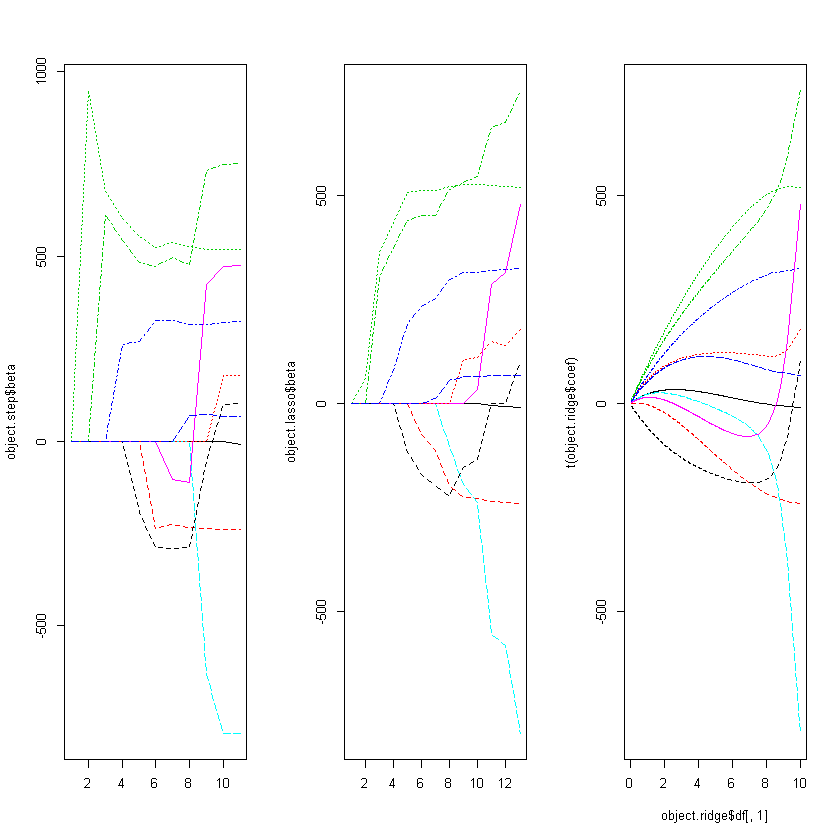

In [7]:
par(mfcol=c(1,3))
matplot(object.step$beta,type="l")
matplot(object.lasso$beta,type="l")
matplot(object.ridge$df[,1],t(object.ridge$coef),type="l")
par(mfcol=c(1,1))

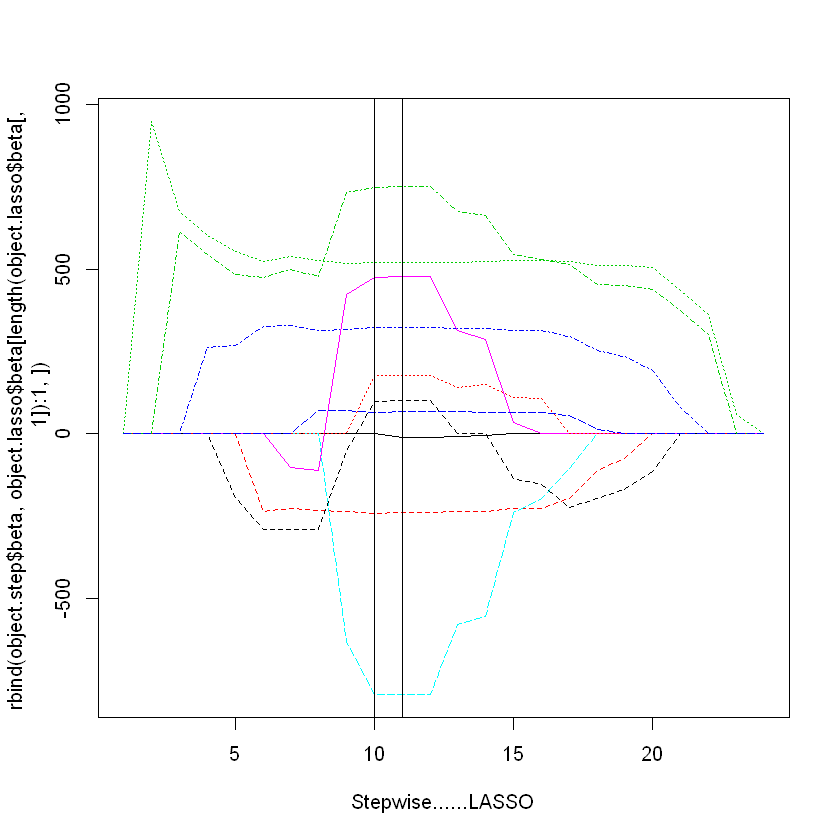

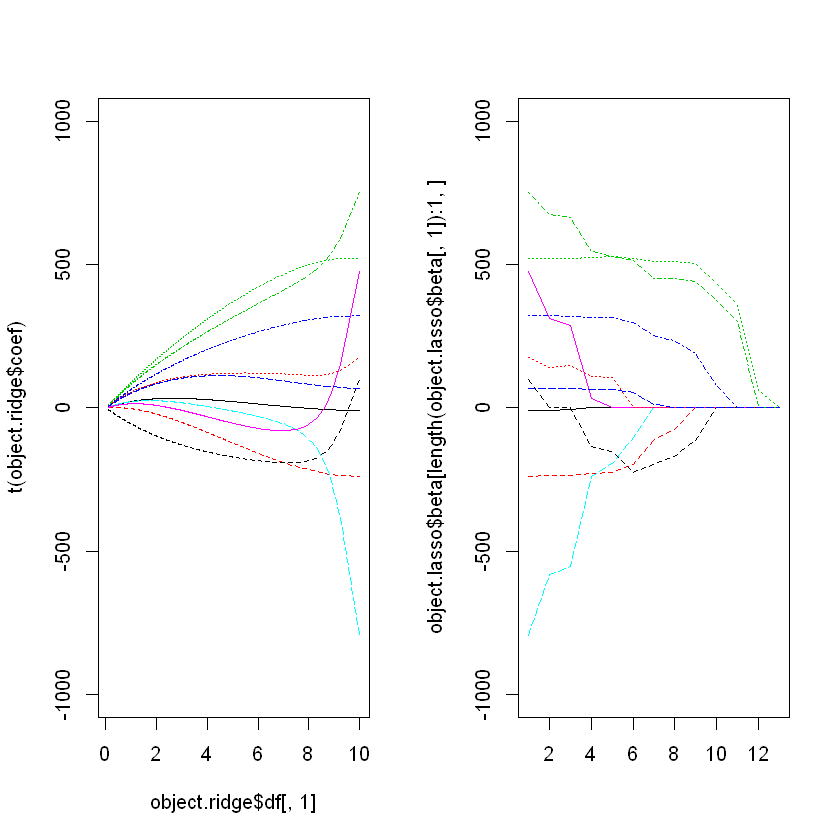

In [8]:
matplot(rbind(object.step$beta,object.lasso$beta[length(object.lasso$beta[,1]):1,]),type="l",xlab="Stepwise......LASSO")
abline(v = c(0,1)+length(object.step$beta[1,]))

par(mfcol=c(1,2))

matplot(object.ridge$df[,1],t(object.ridge$coef),type="l",ylim=c(-1000,1000))
matplot(object.lasso$beta[length(object.lasso$beta[,1]):1,],type="l",ylim=c(-1000,1000))
par(mfcol=c(1,1))
#matplot(object.lasso$beta,type="l")

### Lp norm

$$
L_p = ||v||_p = (\sum v_i^p)^{\frac{1}{p}}
$$

+ LASSO : L1 norm regularization
+ Ridge : L2 norm regularization

See [the shapes of Lp norms](https://tex.stackexchange.com/questions/196135/drawing-some-simple-circular-rectangular-and-triangular-shapes).

# Assignment 課題

+ Parameter k of kNN method is a smoothing parameter for vias-variance tradeoff. See [kNN Classification](../cells/kNN_Classification.ipynb) and desicribe k as a regularization factor.